# Construct dataset

In [1]:
import matplotlib.pyplot as plt
from module.for_dataset.create_dataset import create_dataset
from module.for_model.training import construct_and_train_model
from module.for_dataset.normalization import normalization
from module.for_model.checkpoint import save_checkpoint

In [2]:
X_train, Y_train, X_test, Y_test  = create_dataset(0,20000, "xor")

# 原本數值介於 +-2 之間而已，所以就不用 normalize 了
# 跑了一遍之後發現好像還是需要限縮到 0~1

In [3]:
for x, y , idx in zip(X_train[:5], Y_train[:5], range(len(Y_train))):
    print(f"{idx}\tx = {x},\tY = {y}")

0	x = [-0.11583055  0.00063256],	Y = 0
1	x = [ 0.96636156 -0.04787412],	Y = 1
2	x = [1.06442637 0.1242411 ],	Y = 1
3	x = [ 0.17456393 -0.23159094],	Y = 0
4	x = [0.95481474 0.14791765],	Y = 1


### Preprocess

#### 觀察資料
發現 X 值
1. 有正有負
2. 明顯以 0.5 為中心，分隔開來的兩堆資料 (Y也是)

In [4]:
X_train.shape

(16000, 2)

(array([[1217., 1172., 1125., 1119., 1182., 1094., 1124.,    0.,    0.,
            0.,    0.,    0.,    0., 1157., 1118., 1192., 1105., 1137.,
         1138., 1120.],
        [1151., 1184., 1136., 1199., 1104., 1183., 1167.,    0.,    0.,
            0.,    0.,    0.,    0., 1155., 1138., 1130., 1139., 1097.,
         1126., 1091.]]),
 array([-4.99822310e-01, -3.99832997e-01, -2.99843684e-01, -1.99854371e-01,
        -9.98650585e-02,  1.24254376e-04,  1.00113567e-01,  2.00102880e-01,
         3.00092193e-01,  4.00081506e-01,  5.00070819e-01,  6.00060132e-01,
         7.00049445e-01,  8.00038758e-01,  9.00028070e-01,  1.00001738e+00,
         1.10000670e+00,  1.19999601e+00,  1.29998532e+00,  1.39997463e+00,
         1.49996395e+00]),
 <a list of 2 BarContainer objects>)

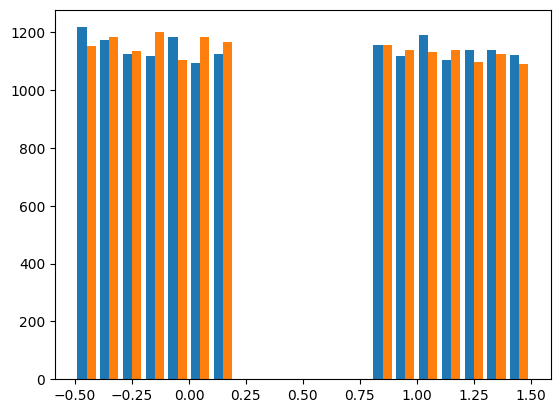

In [5]:
plt.hist(X_train, bins=20)

(array([[286., 274., 289., 311., 290., 265., 308.,   0.,   0.,   0.,   0.,
           0.,   0., 272., 287., 263., 267., 293., 305., 290.],
        [302., 272., 295., 276., 299., 283., 273.,   0.,   0.,   0.,   0.,
           0.,   0., 280., 292., 273., 272., 290., 288., 305.]]),
 array([-4.99758539e-01, -3.99779333e-01, -2.99800127e-01, -1.99820920e-01,
        -9.98417141e-02,  1.37492165e-04,  1.00116698e-01,  2.00095905e-01,
         3.00075111e-01,  4.00054317e-01,  5.00033523e-01,  6.00012730e-01,
         6.99991936e-01,  7.99971142e-01,  8.99950349e-01,  9.99929555e-01,
         1.09990876e+00,  1.19988797e+00,  1.29986717e+00,  1.39984638e+00,
         1.49982559e+00]),
 <a list of 2 BarContainer objects>)

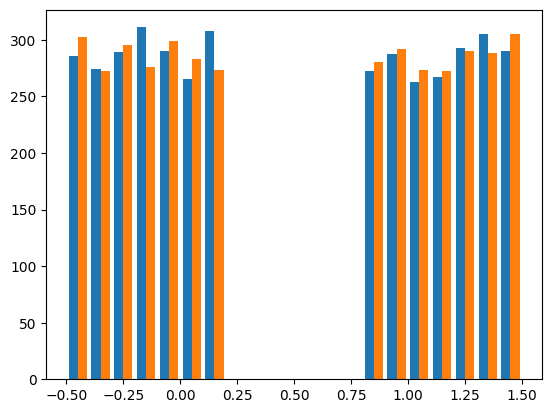

In [6]:
plt.hist(X_test, bins=20)

(array([8017.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        7983.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

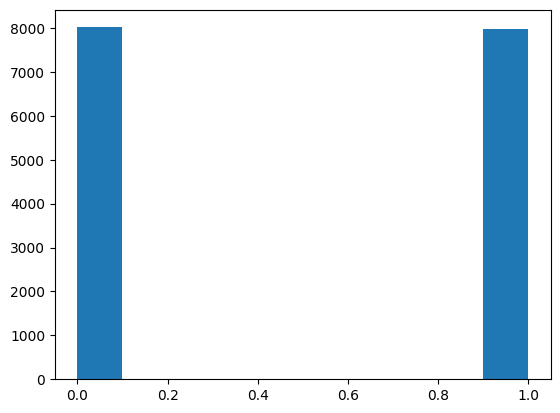

In [7]:
plt.hist(Y_train)

(array([1997.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2003.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

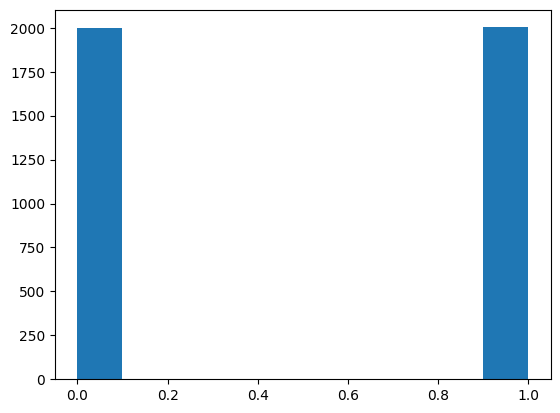

In [8]:
plt.hist(Y_test)

#### 平移+正規化

In [8]:
# reshape for the model output
# 因為計算 backprobagetion 時矩陣相乘的問題，所以需轉換
# 但 shape = (1,) 者無法透過 .T 轉置，所以必須 reshape
Y_train = Y_train.reshape((-1,1))
Y_test = Y_test.reshape((-1,1))

In [9]:
normalizer = normalization(X_train-5)
X_train_n = normalizer.normalize(X_train-5)
Y_train_n = normalizer.normalize(Y_train-5)
X_test_n = normalizer.normalize(X_test-5)
Y_test_n = normalizer.normalize(Y_test-5)

In [10]:
data = [X_train_n, Y_train_n, X_test_n, Y_test_n]

In [ ]:
import pickle
path_folder
path_loss = f"{path_folder}\\loss.pkl"
with open(path_loss, 'wb') as f:
    pickle.dump(data, f)

# Train and Record

In [11]:
folder_test_name = "2024_0606_0216"
n = 2

folder_node = f"node_{n:02d}"
path_folder = f"checkpoints\\{folder_test_name}\\{folder_node}"

loss_n = []
param_n = []
# 用 30 個不同的 randam seed 訓練 30 個不同的模型
for layer_initializer in range(30):
    print(f"\tlayer_initializer = {layer_initializer}")    

    ttl_loss, ttl_param = \
        construct_and_train_model(
            n = n,
            layer_initializer = layer_initializer,
            data = data,
            epoch_cycle = 1
        )
    loss_n.append(ttl_loss)
    param_n.append(ttl_param)

save_checkpoint(path_folder, loss_n, param_n)

	layer_initializer = 0
	layer_initializer = 1
	layer_initializer = 2
	layer_initializer = 3
	layer_initializer = 4
	layer_initializer = 5
	layer_initializer = 6
	layer_initializer = 7
	layer_initializer = 8
	layer_initializer = 9
	layer_initializer = 10
	layer_initializer = 11
	layer_initializer = 12
	layer_initializer = 13
	layer_initializer = 14
	layer_initializer = 15
	layer_initializer = 16
	layer_initializer = 17
	layer_initializer = 18
	layer_initializer = 19
	layer_initializer = 20
	layer_initializer = 21
	layer_initializer = 22
	layer_initializer = 23
	layer_initializer = 24
	layer_initializer = 25
	layer_initializer = 26
	layer_initializer = 27
	layer_initializer = 28
	layer_initializer = 29


('checkpoints\\2024_0606_0216\\node_02\\loss.pkl',
 'checkpoints\\2024_0606_0216\\node_02\\param.pkl')